# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

# <a name="contents">Задачи исследования</a>
# [1. Осмотр данных](#stage_1)
    - посмотрим начало и конец датасета
    - сделаем предварительные выводы
    - поищем аномалии
    

# [2. Обработка данных](#stage_2)
    - найти и обработать пропуски
    - заменить некорректные типы данных
    - удалить дубликаты
    - выделить леммы


# [3. Ответы на вопросы](#stage_3)
    - Есть ли зависимость между наличием детей и возвратом кредита в срок?
    - Есть ли зависимость между семейным положением и возвратом кредита в срок?
    - Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
    - Как разные цели кредита влияют на его возврат в срок?


# [4. Результаты исследования](#stage_4)
    - Общие выводы
    - Рекомендации
# [ Рекомендации](#stage_5)

<a name="stage_1"></a>
# Шаг 1. Откройте файл с данными и изучите общую информацию

In [6]:
import pandas as pd
import numpy as np
import pprint

from pymystem3 import Mystem
from collections import Counter


**Изучим первые 15 строк данной таблице**

In [7]:
data = pd.read_csv('/datasets/data.csv') 
data.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Изучим последние 15 строк данной таблице**

In [8]:
data.tail(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21510,2,NaN,28,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,приобретение автомобиля
21511,0,-612.569129,29,высшее,0,гражданский брак,1,F,сотрудник,1,140068.472941,покупка жилья для сдачи
21512,0,-165.377752,26,высшее,0,Не женат / не замужем,4,M,компаньон,0,147301.457769,получение дополнительного образования
21513,0,-1166.216789,35,среднее,1,женат / замужем,0,F,сотрудник,0,250986.142309,покупка жилья
21514,0,-280.469996,27,неоконченное высшее,2,Не женат / не замужем,4,M,компаньон,0,355988.407188,строительство недвижимости
21515,1,-467.685130,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486.327999,заняться образованием
21516,0,-914.391429,42,высшее,0,женат / замужем,0,F,компаньон,0,322807.776603,покупка своего жилья
21517,0,-404.679034,42,высшее,0,гражданский брак,1,F,компаньон,0,178059.553491,на покупку своего автомобиля
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости


**Чтобы узнать разброс значений, среднюю и медиану, используем метод** 

In [9]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


**Посмотрим общую информацию файла**


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод**

*Мы имеем файл в который состоит из 21524 строк(не самый большой массив данные) в котором мы имеем тип данных int(целые числа) и float(вещественные числа) а так же object(используется, когда данные не подходят ни под одну категорию соответствуют в Python типу "строка".) В days_employed присутствуют NaN(специальное значение, которое присваивается к типу данных float, если результат не может быть представлен как конкретное число, либо попросту неизвестен. В столбце education указана информация, которая по причине человеческого фактора написания/заполнения информации может привести к ошибке при анализе данных.*



*Отрицательные значения*

*Некачественные названия столбцов*

*Прыгающий регистр букв*

*Непонятна валюта месячного дохода*





<a name="stage_2"></a>
# Шаг 2. Предобработка данных

### Обработка пропусков

**Начнем со столбцов** 

In [11]:
data.columns.tolist()

['children',
 'days_employed',
 'dob_years',
 'education',
 'education_id',
 'family_status',
 'family_status_id',
 'gender',
 'income_type',
 'debt',
 'total_income',
 'purpose']

**Для удобства добавим инф**

In [12]:
variable = ['number_of_children',
        'days_employed',
        'client_age_in_years',
        'education_level',
        'education_level_id',
        'family_status',
        'family_status_id',
        'gender',
        'employment_type',
        'credit_repayment_status',
        'monthly_income',
        'credit_purpose']
        
data.set_axis(variable, axis='columns', inplace=True)

**Проверим, получилось ли у нас...**

In [13]:
data.columns.tolist()

['number_of_children',
 'days_employed',
 'client_age_in_years',
 'education_level',
 'education_level_id',
 'family_status',
 'family_status_id',
 'gender',
 'employment_type',
 'credit_repayment_status',
 'monthly_income',
 'credit_purpose']

**Для подчета общего количества пропусков вызовим фунцию isnull().sum()**

In [14]:
data.isnull().sum()

number_of_children            0
days_employed              2174
client_age_in_years           0
education_level               0
education_level_id            0
family_status                 0
family_status_id              0
gender                        0
employment_type               0
credit_repayment_status       0
monthly_income             2174
credit_purpose                0
dtype: int64

**Вывод**

*В столбце days_employed и monthly_income мы получили одинаковое количество пропусков. О чем это может нам говорить? - возможно данные выгружены некорекно, либо лиди работали неофициально...в любом случае, нужно копать дальше*

### Замена типа данных

**Подставлять средние и медианные значения некорректно, так как это повысить шанс получения кредита, изменим все пропски на (0)**

In [15]:
data["days_employed"] = data["days_employed"].fillna(0)

In [16]:
data['monthly_income'] = data['monthly_income'].fillna(0)

**Проверим результат**

In [17]:
data.isnull().sum()

number_of_children         0
days_employed              0
client_age_in_years        0
education_level            0
education_level_id         0
family_status              0
family_status_id           0
gender                     0
employment_type            0
credit_repayment_status    0
monthly_income             0
credit_purpose             0
dtype: int64

**Вывод**

*Для замены пропущенных значений выбрал метод fillna, и задал аргумент (0) для замены. Ни в коем случае дельзя удалять дакие данные!*

### Обработка дубликатов

**Поищем дубикаты**

**Скорее всего они появились из-за ошибки правил валидации на сервере, 
 заявки должны проверяться на дубли там в первую очередь**

In [18]:
data.duplicated().sum()

54

In [19]:
data = data.drop_duplicates().reset_index(drop = True)

**Дубли должны быть удалены, индексы сброшены проверим...**

In [20]:
data.duplicated().sum()

0

In [21]:
data.head(15)

,number_of_children,days_employed,client_age_in_years,education_level,education_level_id,family_status,family_status_id,gender,employment_type,credit_repayment_status,monthly_income,credit_purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Далее мы исследуем каждый столбец отдельно**


In [22]:
#Посчитаем уникальное количество значений, значение -1 и 20 бросается в глаза.
data["number_of_children"].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [23]:
#Проверим сколько значений с (-1)
data[data["number_of_children"] == -1] ["number_of_children"].count()

47

In [24]:
#Заменим значение (-1) на (1)
data["number_of_children"] = data["number_of_children"].replace(-1, 1)

In [25]:
#Проверим, заменили ли мы значение
data[data["number_of_children"] == -1] ["number_of_children"].count()

0

In [26]:
#Проверим сколько значений с (20)
data[data["number_of_children"] == 20]["number_of_children"].count()

76

In [27]:
#Получается много значений, проверим...сгруппируем по возрасту чтобы убедиться в корректноти данных
data[data["number_of_children"] == 20 ].groupby("client_age_in_years")["client_age_in_years"].count()

client_age_in_years
0     1
21    1
23    1
24    1
25    1
26    1
27    2
29    2
30    3
31    2
32    2
33    2
34    3
35    2
36    2
37    4
38    1
39    1
40    4
41    2
42    3
43    2
44    2
45    3
46    3
48    1
49    3
50    3
51    1
52    1
53    1
54    1
55    1
56    5
57    1
59    2
60    1
61    1
62    1
64    1
69    1
Name: client_age_in_years, dtype: int64

In [28]:
#Вернем количество уникальных совпадений в определенной колонке.
data["number_of_children"].value_counts()

0     14107
1      4856
2      2052
3       330
20       76
4        41
5         9
Name: number_of_children, dtype: int64

 **Считаем ошибкой — заменяем на 2.**

In [29]:
#Заменим значение (20) на (2)
data["number_of_children"] = data["number_of_children"].replace(20, 2)

In [30]:
#Проверим, заменили ли мы значение
data[data["number_of_children"] == 2]["number_of_children"].count()

2128

In [31]:
#Со столбцом number_of_children все в порядке
data["number_of_children"].unique()

array([1, 0, 3, 2, 4, 5])

**Далее займеся столбцом days_employed (дни работы)**

In [32]:
# Есть отрицательные значения, значения не в целых числах.
# разберемся с отрицательными значениями
data["days_employed"].describe()

count     21471.000000
mean      56821.423140
std      135010.270744
min      -18388.949901
25%       -2522.536607
50%        -989.271304
75%           0.000000
max      401755.400475
Name: days_employed, dtype: float64

In [33]:
data["days_employed"] = data["days_employed"].abs()

In [34]:
data["days_employed"].describe()

count     21471.000000
mean      60307.713617
std      133489.355354
min           0.000000
25%         620.736110
50%        1818.689386
75%        4794.911909
max      401755.400475
Name: days_employed, dtype: float64

In [35]:
# Стало лучше, но максимальные значения выглядят как "столько не работают"
# Найдем самого великовозрастного человека в наборе
# Если предположить, что он работал с 16 лет, то:
max_days_of_employment = (data['client_age_in_years'].max() - 16) * 365
max_days_of_employment # Получим количество дней, по которым можно сделать отсев

21535

In [36]:
# Многовато, почти 16% от всего набора, но перевести в года и добавить новый столбец не помешает
data[data['days_employed'] > max_days_of_employment]['days_employed'].count() / 21525 * 100


16.004645760743323

In [37]:
data['years_employed'] = data['days_employed'] / 365

In [38]:
data['years_employed'] = data['years_employed'].astype(int)

In [39]:
# Удалим столбец с днями, оставим только года, пока непонятно, 
# что делать с тем, кто работает по тысяче лет, но оставим для лемматизации
del data['days_employed']

In [40]:
data.head()

,number_of_children,client_age_in_years,education_level,education_level_id,family_status,family_status_id,gender,employment_type,credit_repayment_status,monthly_income,credit_purpose,years_employed
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,23
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,11
2,0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,15
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,11
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,932


In [41]:
#Перейдем к возрасту
data["client_age_in_years"].describe()

count    21471.000000
mean        43.279074
std         12.574291
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: client_age_in_years, dtype: float64

In [42]:
# Подсчитаем людей с возрастом меньше 0, 10 и 18 лет, таких 101
data[data["client_age_in_years"] == 0]["client_age_in_years"].count()

101

In [43]:
data[data["years_employed"] >70].groupby(["client_age_in_years"])["client_age_in_years"].count()

client_age_in_years
0      17
22      1
26      2
27      3
28      1
31      1
32      3
33      2
34      3
35      1
36      3
37      5
38      8
39      4
40      7
41      6
42      9
43      9
44     10
45     11
46     13
47     13
48     20
49     30
50     61
51     73
52     95
53    105
54    145
55    162
56    184
57    212
58    208
59    254
60    243
61    214
62    235
63    192
64    179
65    136
66    139
67    132
68     80
69     74
70     54
71     48
72     28
73      6
74      4
Name: client_age_in_years, dtype: int64

In [44]:
# Разберемся с образованием, 
len(data["education_level"].unique())
# Уников 15, а в ID уников 5

15

In [45]:
data["education_level_id"].unique()

array([0, 1, 2, 3, 4])

In [46]:
# Приведем строки к нижнему регистру
data["education_level"] = data["education_level"].str.lower()

In [47]:
data["education_level"].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [48]:
# Разберемся с family_status, с количеством порядок, но приведем все к нижнему регистру
data["family_status"] = data["family_status"].str.lower()

In [49]:
data["family_status"].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'не женат / не замужем'], dtype=object)

In [50]:
# Разберемся gender
data["gender"].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [51]:
# Непоняная запись XNA
data[data["gender"] == "XNA"].count()

number_of_children         1
client_age_in_years        1
education_level            1
education_level_id         1
family_status              1
family_status_id           1
gender                     1
employment_type            1
credit_repayment_status    1
monthly_income             1
credit_purpose             1
years_employed             1
dtype: int64

In [52]:
# Разберемся employment_type
data["employment_type"].unique()
# Тут все в порядке

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

In [53]:
# Смотреть на доходы с 6 знаками после запятой неудобно.
# В контексте задачи, будь то центы, рубли или тиыны — точностью можно пожертвовать.
# Посмотрим на доходы, сначала приведем к целочисленным значениям
data['monthly_income'] = data['monthly_income'].astype(int)

In [54]:
data.head()

,number_of_children,client_age_in_years,education_level,education_level_id,family_status,family_status_id,gender,employment_type,credit_repayment_status,monthly_income,credit_purpose,years_employed
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,23
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,11
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,15
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,11
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,932


In [55]:
data.duplicated().sum()

17

In [56]:
data = data.drop_duplicates().reset_index(drop = True)

In [57]:
data.duplicated().sum()

0

### Лемматизация

In [58]:
# Посмотрим уникальные значения
unique_credit_purposes = data['credit_purpose'].unique().tolist()
unique_credit_purposes

['покупка жилья',
 'приобретение автомобиля',
 'дополнительное образование',
 'сыграть свадьбу',
 'операции с жильем',
 'образование',
 'на проведение свадьбы',
 'покупка жилья для семьи',
 'покупка недвижимости',
 'покупка коммерческой недвижимости',
 'покупка жилой недвижимости',
 'строительство собственной недвижимости',
 'недвижимость',
 'строительство недвижимости',
 'на покупку подержанного автомобиля',
 'на покупку своего автомобиля',
 'операции с коммерческой недвижимостью',
 'строительство жилой недвижимости',
 'жилье',
 'операции со своей недвижимостью',
 'автомобили',
 'заняться образованием',
 'сделка с подержанным автомобилем',
 'получение образования',
 'автомобиль',
 'свадьба',
 'получение дополнительного образования',
 'покупка своего жилья',
 'операции с недвижимостью',
 'получение высшего образования',
 'свой автомобиль',
 'сделка с автомобилем',
 'профильное образование',
 'высшее образование',
 'покупка жилья для сдачи',
 'на покупку автомобиля',
 'ремонт жилью',
 '

In [59]:
m = Mystem()
string = '; '.join(unique_credit_purposes)
pprint.pprint(string)

('покупка жилья; приобретение автомобиля; дополнительное образование; сыграть '
 'свадьбу; операции с жильем; образование; на проведение свадьбы; покупка '
 'жилья для семьи; покупка недвижимости; покупка коммерческой недвижимости; '
 'покупка жилой недвижимости; строительство собственной недвижимости; '
 'недвижимость; строительство недвижимости; на покупку подержанного '
 'автомобиля; на покупку своего автомобиля; операции с коммерческой '
 'недвижимостью; строительство жилой недвижимости; жилье; операции со своей '
 'недвижимостью; автомобили; заняться образованием; сделка с подержанным '
 'автомобилем; получение образования; автомобиль; свадьба; получение '
 'дополнительного образования; покупка своего жилья; операции с недвижимостью; '
 'получение высшего образования; свой автомобиль; сделка с автомобилем; '
 'профильное образование; высшее образование; покупка жилья для сдачи; на '
 'покупку автомобиля; ремонт жилью; заняться высшим образованием')


In [60]:
lemmas = m.lemmatize(string)
pprint.pprint(Counter(lemmas))

Counter({' ': 59,
         '; ': 37,
         'покупка': 10,
         'недвижимость': 10,
         'автомобиль': 9,
         'образование': 9,
         'жилье': 7,
         'с': 5,
         'операция': 4,
         'на': 4,
         'свой': 4,
         'свадьба': 3,
         'строительство': 3,
         'получение': 3,
         'высокий': 3,
         'дополнительный': 2,
         'для': 2,
         'коммерческий': 2,
         'жилой': 2,
         'подержать': 2,
         'заниматься': 2,
         'сделка': 2,
         'приобретение': 1,
         'сыграть': 1,
         'проведение': 1,
         'семья': 1,
         'собственный': 1,
         'со': 1,
         'профильный': 1,
         'сдача': 1,
         'ремонт': 1,
         '\n': 1})


In [61]:
# Напишем функцию для более точного отображения вида кредита кредита
def type_of_loan(credit_purpose):
    if 'образован' in credit_purpose:
             return 'Оброзовательный кредит'
    if 'авто' in credit_purpose:
             return 'Автокредит'
    if 'свадь' in credit_purpose:
             return 'Кредит на неотложные нужды'
    if 'жиль' or 'недв' in credit_purpose:
             return 'Ипотечные кредиты'
    return 'Ошибка классификации'

In [62]:
data['type_of_loan'] = data['credit_purpose'].apply(type_of_loan)

In [63]:
loan_type_set = data.groupby('type_of_loan')['credit_repayment_status'].sum() / \
     data.groupby('type_of_loan')['credit_repayment_status'].count() * 100

In [64]:
loan_type_set.sort_values()

type_of_loan
Ипотечные кредиты             7.233373
Кредит на неотложные нужды    8.003442
Оброзовательный кредит        9.220035
Автокредит                    9.359034
Name: credit_repayment_status, dtype: float64

In [65]:
loan_type_set.count()

4

In [66]:
data.head()

,number_of_children,client_age_in_years,education_level,education_level_id,family_status,family_status_id,gender,employment_type,credit_repayment_status,monthly_income,credit_purpose,years_employed,type_of_loan
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,23,Ипотечные кредиты
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,11,Автокредит
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,15,Ипотечные кредиты
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,11,Оброзовательный кредит
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,932,Кредит на неотложные нужды


**Вывод**

*Заполнили пропуски , провели анализ и замену дубликатов, выделили лемматизацию. В датасете остались явно некорректные значения, но на последующий анализ они повлиять не должны.*

<a name="stage_3"></a>
# Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [67]:
number_of_children_set = data.groupby('number_of_children')['credit_repayment_status'].sum() / \
    data.groupby('number_of_children')['credit_repayment_status'].count() * 100

In [68]:
number_of_children_set

number_of_children
0    7.543822
1    9.165808
2    9.492481
3    8.181818
4    9.756098
5    0.000000
Name: credit_repayment_status, dtype: float64

In [69]:
grouped_number_of_children = data.groupby('number_of_children')['credit_repayment_status'].count()
grouped_number_of_children

number_of_children
0    14091
1     4855
2     2128
3      330
4       41
5        9
Name: credit_repayment_status, dtype: int64

In [70]:
children_pivot = data.pivot_table(index=['number_of_children'], \
                                columns = ['credit_repayment_status'], \
                                values = 'credit_purpose', aggfunc='count')

children_pivot['ratio'] = children_pivot[1] / children_pivot[0] * 100
children_pivot

# Не смотря на то, что часть данных потерялась, на выводах это не сказывается.

credit_repayment_status,0,1,ratio
number_of_children,,,
0,13028.0,1063.0,8.159349
1,4410.0,445.0,10.090703
2,1926.0,202.0,10.488058
3,303.0,27.0,8.910891
4,37.0,4.0,10.810811
5,9.0,NaN,NaN


##### **Вывод**

*Количество детей, влияет  на возврат кредита в срок*

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [71]:
family_status_pivot = data.groupby("family_status")["credit_repayment_status"].sum()
data.groupby("family_status")["credit_repayment_status"].count() * 100

family_status
в разводе                 119500
вдовец / вдова             95900
гражданский брак          415100
женат / замужем          1233900
не женат / не замужем     281000
Name: credit_repayment_status, dtype: int64

In [72]:
family_status_pivot = data.pivot_table(index=['family_status'], \
                                columns = ['credit_repayment_status'], \
                                values = 'monthly_income', aggfunc='count')

family_status_pivot['ratio'] = family_status_pivot[1] / family_status_pivot[0] * 100
family_status_pivot

credit_repayment_status,0,1,ratio
family_status,,,
в разводе,1110,85,7.657658
вдовец / вдова,896,63,7.031250
гражданский брак,3763,388,10.310922
женат / замужем,11408,931,8.160940
не женат / не замужем,2536,274,10.804416


**Вывод**

*С уверенностью могу сказать, что есть прямая зависимость между семейным положением и возвратом кредита, а именно принимающии на себя обязательство возвратить в установленный срок, котрые нахадятя в статусе "в разводе", и "вдовец / вдова". Не могу не заметить ключвые показатели...Люди которые не связаны серьезными обязательсвами "не женат / не замужем" и "гражданский брак" лучше выплачивают кредит, а это значит, что банки могут предлогать разные "специальные условия" кредита, с увереностью что отсутствие выплат минимизировано*

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [73]:
data['monthly_income'].quantile([0.25,0.5,0.75])

0.25     89088.50
0.50    135781.00
0.75    195813.25
Name: monthly_income, dtype: float64

In [74]:
#Создаем 4 категории в котором указывается группы доходов
def income_status(monthly_income):
    if monthly_income <= 88946.5:
        return "Низкий уровень дохода"
    if monthly_income <= 135716.0:
        return "Средний уровень догода"
    if monthly_income < 195751.5:
        return "Высокий уровень дохода"
    return "Сверхдоходность"   

In [75]:
data['income_status'] = data['monthly_income'].apply(income_status)

In [76]:
data.head()

,number_of_children,client_age_in_years,education_level,education_level_id,family_status,family_status_id,gender,employment_type,credit_repayment_status,monthly_income,credit_purpose,years_employed,type_of_loan,income_status
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,23,Ипотечные кредиты,Сверхдоходность
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,11,Автокредит,Средний уровень догода
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,15,Ипотечные кредиты,Высокий уровень дохода
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,11,Оброзовательный кредит,Сверхдоходность
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,932,Кредит на неотложные нужды,Высокий уровень дохода


In [77]:
monthly_income_set = data.groupby('income_status')['credit_repayment_status'].sum() / \
      data.groupby('income_status')['credit_repayment_status'].count() * 100

In [78]:
monthly_income_set.sort_values()

income_status
Сверхдоходность           7.134873
Низкий уровень дохода     7.830312
Средний уровень догода    8.476155
Высокий уровень дохода    9.018073
Name: credit_repayment_status, dtype: float64

In [79]:
monthly_income_pivot = data.pivot_table(index=['income_status'], columns=['credit_repayment_status'], values='education_level_id', aggfunc='count')
monthly_income_pivot['ratio'] = monthly_income_pivot[1] / monthly_income_pivot[0] * 100
monthly_income_pivot

credit_repayment_status,0,1,ratio
income_status,,,
Высокий уровень дохода,4883,484,9.911939
Низкий уровень дохода,4932,419,8.495539
Сверхдоходность,4985,383,7.683049
Средний уровень догода,4913,455,9.261144


In [80]:
# Проверим количество людей в каждой из групп
data['income_status'].value_counts(normalize = True)

Средний уровень догода    0.250210
Сверхдоходность           0.250210
Высокий уровень дохода    0.250163
Низкий уровень дохода     0.249417
Name: income_status, dtype: float64

**Вывод**

*Есть незначительная разница в возвращаемости кредитов от уровня доходов. Хуже всего покатель у людей со сверхвысокими и низкими доходами. Если зависимость возвращаемости кредитов у людей с низкими доходами очевидна, то сверхвысокие объяснить не могу. С количеством человек в каждой из групп — порядок.*


- Как разные цели кредита влияют на его возврат в срок?

In [81]:
# Напишем функцию для более точного отображения целей кредита
def credit_purpose_status(credit_purpose):
    if 'образован' in credit_purpose:
             return 'Образование'
    if 'авто' in credit_purpose:
             return 'Автомобиль'
    if 'свадь' in credit_purpose:
             return 'Свадьба'
    if 'жиль' or 'недв' in credit_purpose:
             return 'Недвижимость'
    return 'Ошибка классификации'

In [82]:
data['credit_purpose_status'] = data['credit_purpose'].apply(credit_purpose_status)

In [83]:
credit_purpose_set = data.groupby('credit_purpose_status')['credit_repayment_status'].sum() / \
     data.groupby('credit_purpose_status')['credit_repayment_status'].count() * 100

In [84]:
credit_purpose_set.sort_values()

credit_purpose_status
Недвижимость    7.233373
Свадьба         8.003442
Образование     9.220035
Автомобиль      9.359034
Name: credit_repayment_status, dtype: float64

In [85]:
# Попробуем через map(), составим словарь из двух списков
credit_purpose_keys= []
credit_purpose_list = list(data.credit_purpose.unique())
for value in range(len(credit_purpose_list)):
    if 'образован' in credit_purpose_list[value]:
        credit_purpose_keys.append('Образование')
    elif 'авто' in credit_purpose_list[value]:
        credit_purpose_keys.append('Автомобиль')
    elif 'свадь' in credit_purpose_list[value]:
        credit_purpose_keys.append('Свадьба')
    else:
        credit_purpose_keys.append('Недвижимость')
        
credit_purpose_keys

['Недвижимость',
 'Автомобиль',
 'Образование',
 'Свадьба',
 'Недвижимость',
 'Образование',
 'Свадьба',
 'Недвижимость',
 'Недвижимость',
 'Недвижимость',
 'Недвижимость',
 'Недвижимость',
 'Недвижимость',
 'Недвижимость',
 'Автомобиль',
 'Автомобиль',
 'Недвижимость',
 'Недвижимость',
 'Недвижимость',
 'Недвижимость',
 'Автомобиль',
 'Образование',
 'Автомобиль',
 'Образование',
 'Автомобиль',
 'Свадьба',
 'Образование',
 'Недвижимость',
 'Недвижимость',
 'Образование',
 'Автомобиль',
 'Автомобиль',
 'Образование',
 'Образование',
 'Недвижимость',
 'Автомобиль',
 'Недвижимость',
 'Образование']

In [86]:
credit_purpose_list

['покупка жилья',
 'приобретение автомобиля',
 'дополнительное образование',
 'сыграть свадьбу',
 'операции с жильем',
 'образование',
 'на проведение свадьбы',
 'покупка жилья для семьи',
 'покупка недвижимости',
 'покупка коммерческой недвижимости',
 'покупка жилой недвижимости',
 'строительство собственной недвижимости',
 'недвижимость',
 'строительство недвижимости',
 'на покупку подержанного автомобиля',
 'на покупку своего автомобиля',
 'операции с коммерческой недвижимостью',
 'строительство жилой недвижимости',
 'жилье',
 'операции со своей недвижимостью',
 'автомобили',
 'заняться образованием',
 'сделка с подержанным автомобилем',
 'получение образования',
 'автомобиль',
 'свадьба',
 'получение дополнительного образования',
 'покупка своего жилья',
 'операции с недвижимостью',
 'получение высшего образования',
 'свой автомобиль',
 'сделка с автомобилем',
 'профильное образование',
 'высшее образование',
 'покупка жилья для сдачи',
 'на покупку автомобиля',
 'ремонт жилью',
 '

In [87]:
#Сшили словарь, теперь можно передать в map()
credit_purpose_dict = dict(zip(credit_purpose_list, credit_purpose_keys))

In [88]:
# Готово, работает, хотя не уверен, что нужно было действовать именно так
data['credit_purpose_status'] = data['credit_purpose'].map(credit_purpose_dict)

In [89]:
credit_purpose_pivot = data.pivot_table(index=['credit_purpose_status'], columns=['credit_repayment_status'], values='education_level_id', aggfunc='count')
credit_purpose_pivot['ratio'] = credit_purpose_pivot[1] / credit_purpose_pivot[0] * 100
credit_purpose_pivot

credit_repayment_status,0,1,ratio
credit_purpose_status,,,
Автомобиль,3903,403,10.325391
Недвижимость,10029,782,7.797388
Образование,3643,370,10.156464
Свадьба,2138,186,8.699719


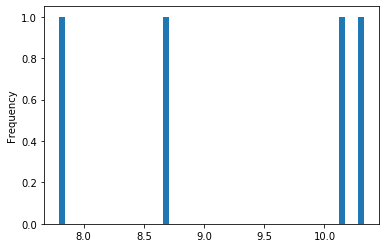

In [90]:
%matplotlib inline
credit_purpose_pivot.ratio.plot.hist(bins=50)

**Вывод**

*Цели кредита влияют.
Хуже всего выглядят свадьбы и недвижимость. Выглядит логично, ипотека — пожалуй, самая крупная кредитная и рисковая сделка для частного лица.
Свадьбы — это не инвестиционный проект и это неликвидный кредит, который по сути проедают.*


<a name="stage_4"></a>
# Шаг 4. Общий вывод

*Есть зависимости между целями кредита, семейным положением, уровнем дохода и количеством детей в семье. Нельзя сказать, что они кардинально отличаются, но 3% на больших числах могут оказать существенное влияние на кредитный портфель банка. Особое внимание следует уделить вдовам/вдовцам или молодоженам — с ними могут риски по невозврату кредитов выше, что касается молодежи, на их акцентировать внимание и предлагать "плюшки" так как со стороны платежеспособности, он показывают себя с положительной стороны*

<a name="stage_5"></a>
# Рекомендации для банка

- Считать стаж работы в годах, пользователи чаще всего не знают свой стаж в днях.
- Показывать операторам в банке или пользователям на сайте подсказки заранее, когда вводят сверхвысокие/сверхнизкие
  значения в полях: возраст, стаж, количество детей.
- Блокироват, или высвечивать инф о некорректности вводимых данных, то есть -  отправку заявок с заведомо некорректными значениями, которые могут быть важны для анализа, например,
  с отрицательным количеством детей.
- Особое внимание следует уделить вдовам/вдовцам или молодоженам — с ними могут риски по невозврату кредитов выше, что касается молодежи, на их акцентировать внимание и предлагать "плюшки" так как со стороны платежеспособности, он показывают себя с положительной стороны

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Спасибо за твою работу! Ты хорошо справился с подготовкой и анализом данных.

   

</div>


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.